# Fraud Detection on Credit Card Transactions

## Table of Contents

### Data Exploration

Read the data and identify data issues such as null values, duplicates, zeros, etc.


### Data Visualization

Plot histograms, bars and find outliers, correlations, etc.


### Data Preparation

Clean the data issues previously identified, such as nulls, duplicates and get rid of outliers.


### Data Encoding

Depends on the scenario, choose techniques such as binary or label encoding to handle categorical variables.


### Feature Selection

Use appropriate selection techniques such as Lasso, Ridge, etc. to identify the minimalistic and impactful features.


### Modeling

Create classifier models K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines and compare the results.

## Problem Identification

Per Nilson's report in 2022, payments industry in the United States is expected to incur $165 billion loss in the next 10 yrs due to fraudulent use of credit cards.It can be largely reduced by building a more robust fraud detection system using machine learning models. This work aims to use some sample dataset, analyze the data, build few ML models, compare and suggest a best model suitable for this use case.

Identify and prevent fraud transactions in credit cards in realtime and thereby protect customers from losing money and help finance companies well serve their customers better. Our focus will be on coming up with a machine learning model that can predict the fraud transaction accurately.

In [2]:
# Include all neccessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE

import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

## Dataset Selection

Will be using the dataset named 'Credit Card Transactions Fraud Detection Dataset' in Kaggle.
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [3]:
# Import the train & test data

data_train = pd.read_csv('fraudTrain.csv')
data_test = pd.read_csv('fraudTest.csv')

In [4]:
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
data_train.shape

(1296675, 23)

In [9]:
data_test.shape

(555719, 23)

## Data Cleaning

### check for unique values

This will provide an idea for encoding

In [10]:
data_train.nunique(axis=0)

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

Note: We are able to get some idea about each columns knowing how many unique values exist. Especially for attributes like is_fraud, state, gender, category, etc.

### check for duplicate values

In [11]:
data_train[data_train.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


Note: There are no duplicate rows.

## Exploratory Analysis 
(Data Visualization)

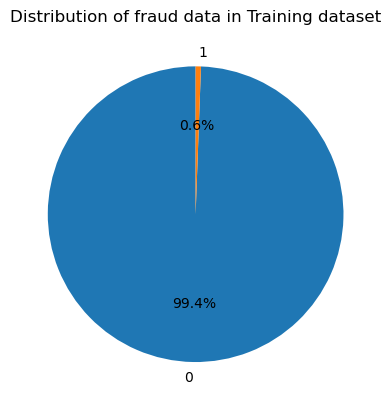

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [12]:
# Distribution of fraudulent transactions in training data
value_counts = data_train['is_fraud'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of fraud data in Training dataset')
plt.show()
print(value_counts)

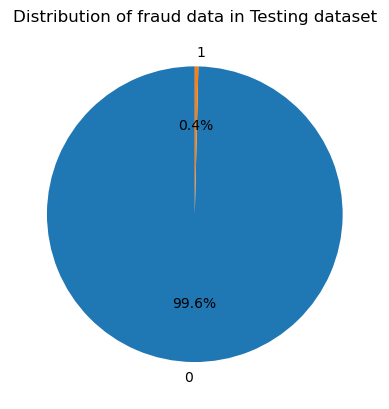

0    553574
1      2145
Name: is_fraud, dtype: int64


In [13]:
# Distribution of fraudulent transactions in testing data
value_counts = data_test['is_fraud'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of fraud data in Testing dataset')
plt.show()
print(value_counts)

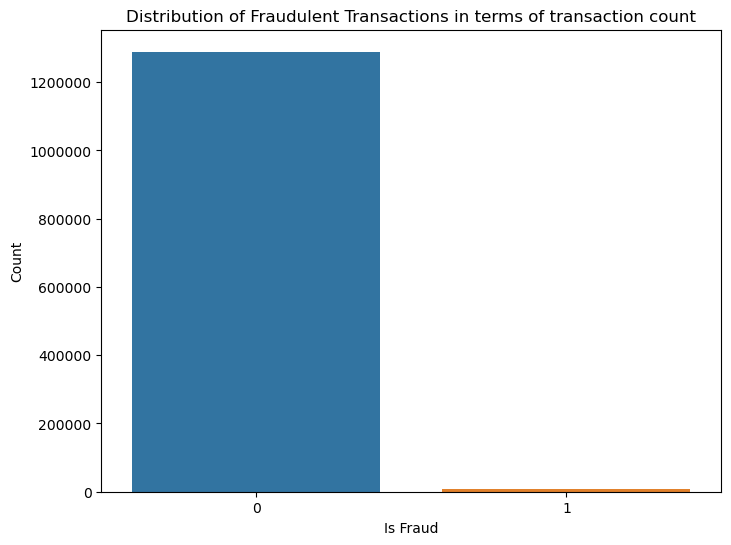

In [14]:
# Distribution of fraudulent transactions in terms of transaction count
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data_train)
plt.title('Distribution of Fraudulent Transactions in terms of transaction count')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

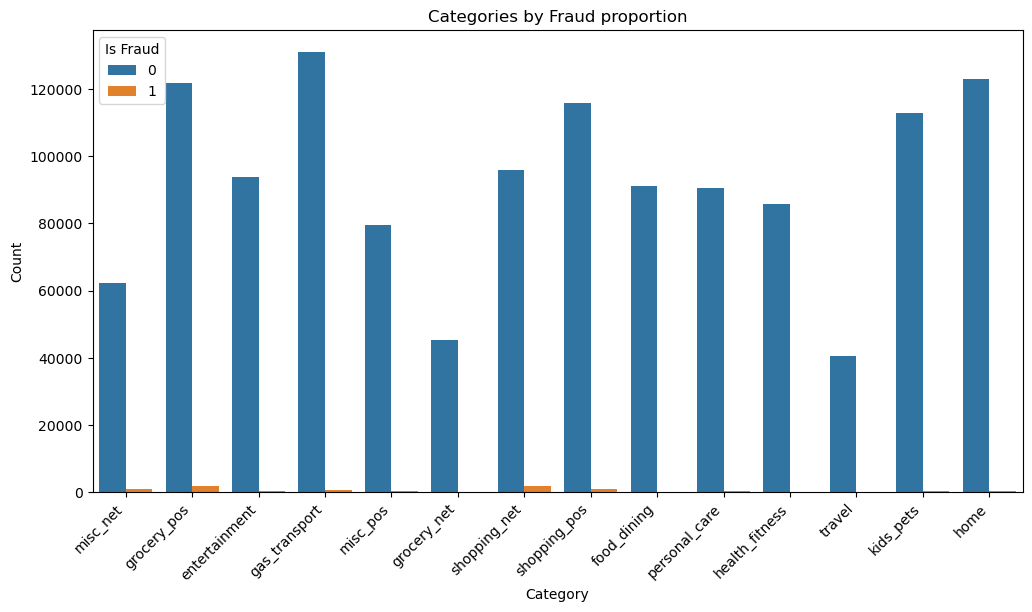

In [16]:
# Categories by fraud proportion
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=data_train)
plt.title('Categories by Fraud proportion')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

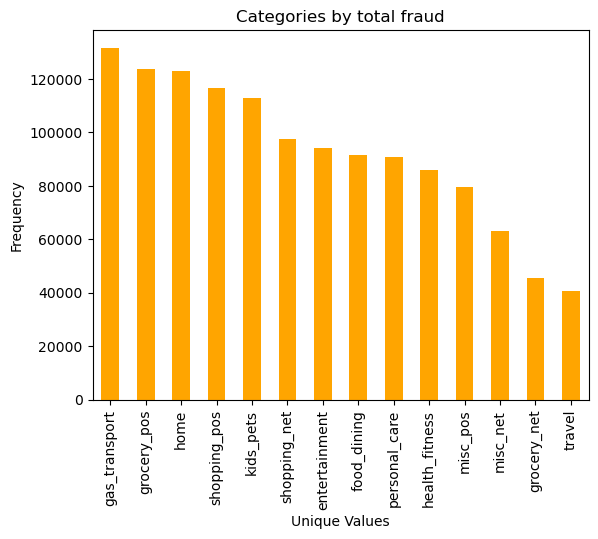

In [18]:
# Categories by fraud
value_counts = data_train['category'].value_counts()
value_counts.plot(kind='bar', color='orange')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Categories by total fraud')
plt.show()

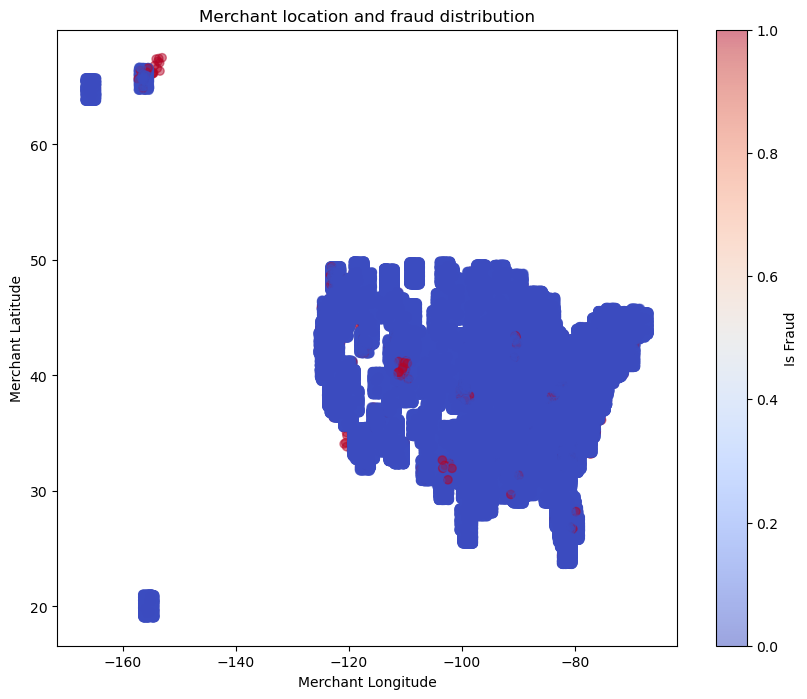

In [37]:
# Merchant location and fraud distribution
plt.figure(figsize=(10, 8))
plt.scatter(data_train['merch_long'], data_train['merch_lat'], c=data_train['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Merchant location and fraud distribution')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

## Statistical Analysis

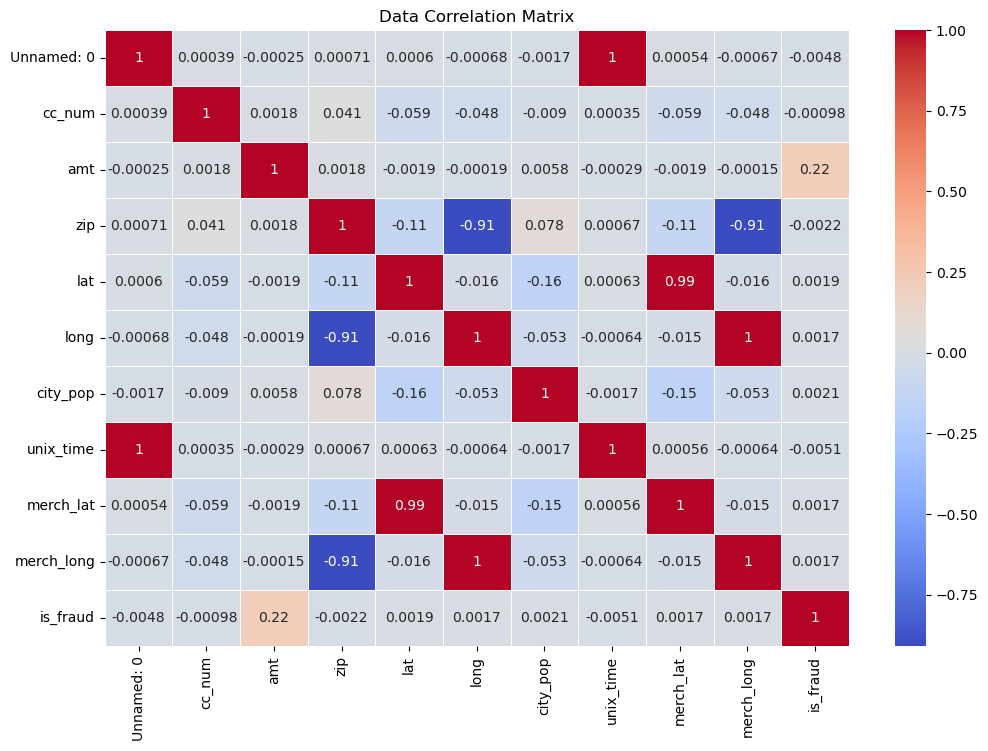

In [22]:
# heatmap on correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Data Correlation Matrix")
plt.show()

## Dataset Preparation

### includes encoding, feature scaling, smote for synthetic data balancing, shuffliing

In [23]:
# Encoding
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(data_train[categorical_cols]).toarray()
encoded_test_features = encoder.transform(data_test[categorical_cols]).toarray()

In [24]:
# Feature scaling
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(data_train[numerical_cols])
scaled_test_features = scaler.transform(data_test[numerical_cols])

In [25]:
# Combine encoded and scaled features
final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

In [26]:
# targets
train_target = data_train['is_fraud']
test_target = data_test['is_fraud']

In [27]:
# Synthetic data to balance the dataset
smote = SMOTE(random_state=36)
x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)

In [28]:
len(y_train_resample)

2578338

In [29]:
# shuffle dataset
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

In [30]:
# Split dataset into train and test
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.25)

In [31]:
# Select a subset of data for training

x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:20000]
y_train = y_train[:20000]

## Build Machine Learning Models

### choose best model with tuning of parameters

In [34]:
# choose hyper parameter values to use
logistic_regression_parameters = {
    'solver' : ['newton-cg', 'liblinear', 'sag'],
    'C': [0.1, 10, 100],
    'max_iter': [100, 500],
    'penalty': ['none', 'l1', 'elasticnet']
}

# Logistic Regression Model
lg_model = LogisticRegression()

# create a grid search object
lr_grid = GridSearchCV(lg_model, logistic_regression_parameters, scoring='accuracy')

lr_grid.fit(x_train, y_train)

# Make predictions
lg_predictions = lr_grid.predict(x_validation)

# calculate various metrics (accuracy, precision, recall, f1)
lr_accuracy = accuracy_score(y_validation, lg_predictions)
lr_precision = precision_score(y_validation, lg_predictions)
lr_recall = recall_score(y_validation, lg_predictions)
lr_f1 = f1_score(y_validation, lg_predictions)

print("Logistic Regression Accuracy: {:.3f}%".format(lr_accuracy * 100))
print("Logistic Regression Precision: {:.3f}%".format(lr_precision * 100))
print("Logistic Regression Recall: {:.3f}%".format(lr_recall * 100))
print("Logistic Regression F1_Score: {:.3f}%".format(lr_f1 * 100))

Logistic Regression Accuracy: 82.135%
Logistic Regression Precision: 86.269%
Logistic Regression Recall: 76.430%
Logistic Regression F1_Score: 81.052%


In [35]:
# choose hyper parameter values to use
knn_parameters = {
    'n_neighbors': [3, 5, 7, 9]
}

# KNN model
knn_model = KNeighborsClassifier()

# create a grid search object
knn_grid = GridSearchCV(knn_model, knn_parameters, scoring='accuracy')

# fit the grid with data
knn_grid.fit(x_train, y_train)

# Make predictions
knn_predictions = knn_grid.predict(x_validation)

# calculate various metrics (accuracy, precision, recall, f1)
knn_accuracy = accuracy_score(y_validation, knn_predictions)
knn_precision = precision_score(y_validation, knn_predictions)
knn_recall = recall_score(y_validation, knn_predictions)
knn_f1 = f1_score(y_validation, knn_predictions)

print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100))
print("KNN Precision: {:.3f}%".format(knn_precision * 100))
print("KNN Recall: {:.3f}%".format(knn_recall * 100))
print("KNN F1_Score: {:.3f}%".format(knn_f1 * 100))

KNN Accuracy: 91.631%
KNN Precision: 89.298%
KNN Recall: 94.598%
KNN F1_Score: 91.872%


In [36]:
# choose hyper parameter values to use
svc_parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 100]
}

# SVM model
svm_model = SVC(kernel='poly')

# create a grid search object
svc_grid = GridSearchCV(svm_model, svc_parameters, scoring='accuracy')

# fit the model with data
svc_grid.fit(x_train, y_train)

# Make predictions
svm_predictions = svc_grid.predict(x_validation)

# Calculate metrics
svm_accuracy = accuracy_score(y_validation, svm_predictions)
svm_precision = precision_score(y_validation, svm_predictions)
svm_recall = recall_score(y_validation, svm_predictions)
svm_f1 = f1_score(y_validation, svm_predictions)

print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100))
print("SVM Precision: {:.3f}%".format(svm_precision * 100))
print("SVM Recall: {:.3f}%".format(svm_recall * 100))
print("SVM F1_Score: {:.3f}%".format(svm_f1 * 100))

SVM Accuracy: 96.160%
SVM Precision: 97.059%
SVM Recall: 95.205%
SVM F1_Score: 96.123%


## Compare Models

### findings

In [44]:
print("LR Accuracy: {:.3f}%".format(lr_accuracy * 100), 
      "LR Precision: {:.3f}%".format(lr_precision * 100), 
      "LR Recall: {:.3f}%".format(lr_recall * 100), 
      "LR F1_Score: {:.3f}%".format(lr_f1 * 100))
print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100), 
      "KNN Precision: {:.3f}%".format(knn_precision * 100), 
      "KNN Recall: {:.3f}%".format(knn_recall * 100),
      "KNN F1_Score: {:.3f}%".format(knn_f1 * 100))
print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100), 
      "SVM Precision: {:.3f}%".format(svm_precision * 100),
      "SVM Recall: {:.3f}%".format(svm_recall * 100),
      "SVM F1_Score: {:.3f}%".format(svm_f1 * 100))

LR Accuracy: 82.135% LR Precision: 86.269% LR Recall: 76.430% LR F1_Score: 81.052%
KNN Accuracy: 91.631% KNN Precision: 89.298% KNN Recall: 94.598% KNN F1_Score: 91.872%
SVM Accuracy: 96.160% SVM Precision: 97.059% SVM Recall: 95.205% SVM F1_Score: 96.123%


After evaluating the models, gives an idea how the classification models are performing.

We have used the hyper parameters to tune to get the best model possible in each category, then compared various scores with one another.

SVM model provides a better accuracy compared to other models.
SVM model provides a better precision compared to other models.
SVM model provides a better recall compared to other models.
SVM model provides a better f1 score compared to other models.

KNN stands next to SVM in terms of scores, from above evaluation.

Next Steps:
- Find out the deployment strategry to use the model for fraud detection in real time.

The key for success would be to plug this model in a real time environment and make it improve by itself, learning from training using real time data.

This model alone cannot solve the larger problem of mitigating fraud but this can help identify the fraud transaction and together with other well management processes, this can contribute towards fraud detection and prevention overall. 